<center> 
    
<div style="width: 800px;  padding-top:10px; padding-bottom:10px;border: 3px solid #000000 ; text-align: center ;background: #f2f2f2;">

<h1> <u> Projet d'informatique</u> </h1> 
<h2>Optimisation d'un réseau de livraison </h2>

<div style="height:20px;display:block;"> </div>
 
</div> 

<h3> Emma BOU HANNA - Sandra CLODION - Sophie ROSSI <br>   
<hr>
Encadré par : Ignacio SOMOZA SOTILLOS - Stanislas BARRAULT (Ekimetrics) </h3>

</center>

<center>
    
<h1> Contextualisation du sujet </h1>

</center>

**Réseau de livraison** :

+ système très complexe

+ nombreux enjeux : économiques, environnementaux, sociaux ...

### Choix d'un cadre d'étude plus précis

+ Last mile delivery = 30 % du coût de livraison
<br>
$\Rightarrow$ choix de se focaliser sur le *last mile delivery* en Île-de-France

<center>
    
<h1> Réflexions sur le modèle à adopter </h1>

</center>

+ **1ère piste** : Développer un algorithme d'apprentissage automatique <br>
$\rightarrow$ <font color='red'> pas de données disponibles pour entraîner un tel modèle </font>
$\Rightarrow$ abandon 

+ **2ème piste** : Développer un algorithme probabiliste ne nécessitant pas de données réelles <br>
**$\Rightarrow$ piste retenue pour ce projet**

<center>

<h1> Réalisation pratique </h1>

</center>

+ **Principe général de l'algorithme** :

    + n entrepôts fixés
    + clients générés aléatoirement et répartis aléatoirement entre les entrepôts
    + véhicules de livraison : camions 
        + affiliés aux entrepôts
        + capacité fixée
        + départ de l'entrepôt, arrivée à l'entrepôt
    + division du problème d'optimisation en n sous-problèmes

+ **Partage du travail en 3 parties** :

    + Extraction et traitement des données géographiques (étapes 0, 1) et visualisation
    + Construction d'un graphe représentant le problème, en créant des classes (étape 2)
    + Implémentation d'un algorithme d'optimisation inspiré d'un algorithme génétique (étape 3)

In [2]:
from IPython.display import Image
import os
import pandas as pd
os.chdir("/Users/sandraclodion/GitHub/optim_livraison/")

## Etape n°0 : Création et sauvegarde des données géographiques nécessaires

+ Création fichier `warehouses_idf.csv`


+ Création fichier `save_useful_data.py`

### Fichier `warehouses_idf.csv`

+ créé à la main, liste les localisations des principaux lieux d'entreposage des colis en Île-de-France

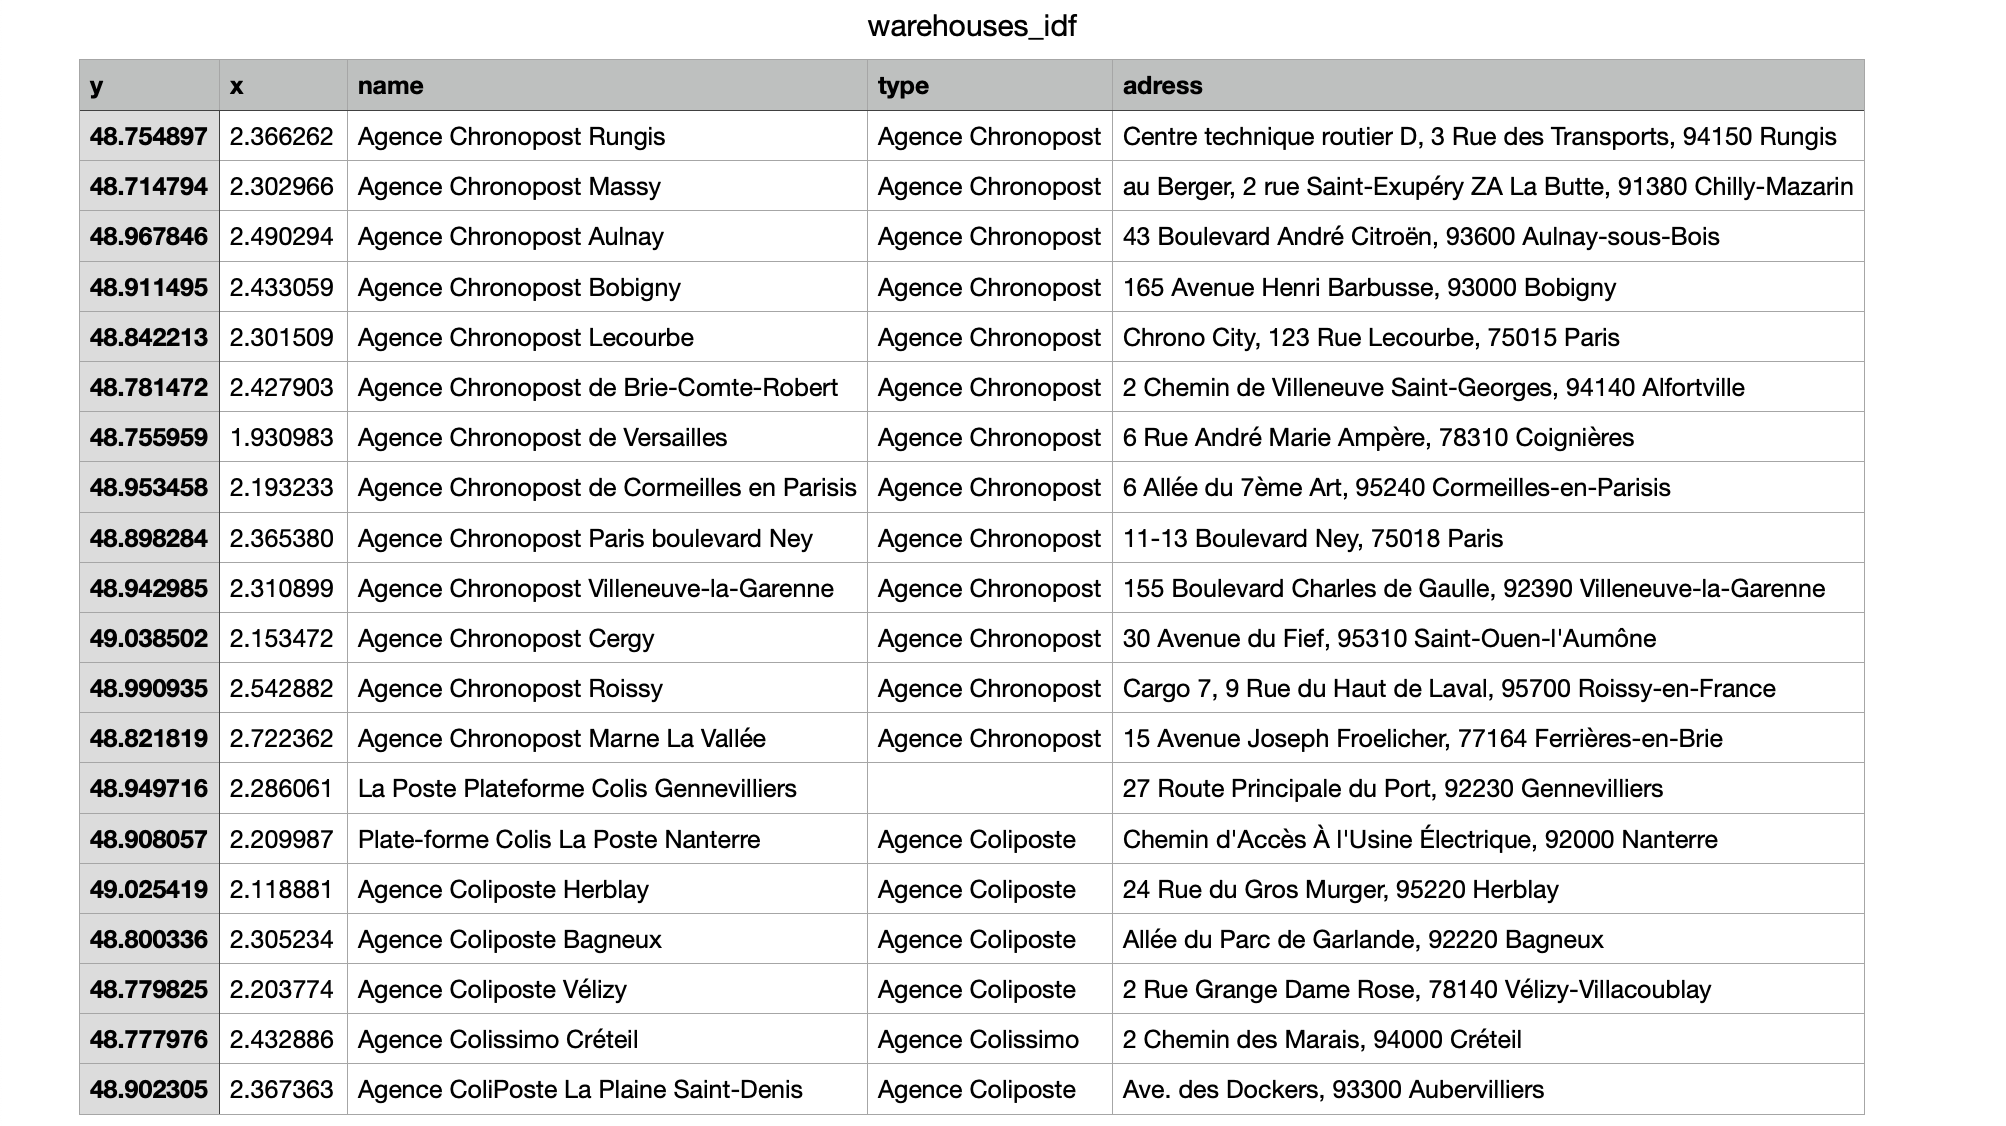

In [3]:
Image(filename = "images/fichier csv warehouses.png")

### Fichier `save_useful_data.py`

Calcule le graphe de l'Île-de-France et sauvegarde ces données en local

### Fichier `save_useful_data.py`

+ Calcul du graphe de l'Île-de-France à l'aide du module `osmnx`

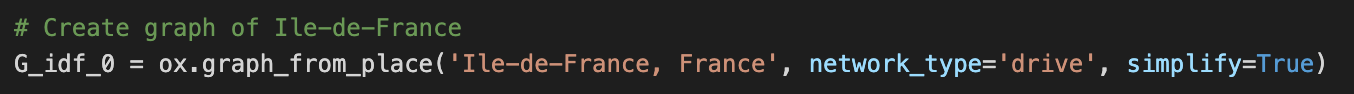

In [4]:
Image(filename = "images/create graph of idf.png")

In [3]:
import networkx as nx
import osmnx as ox
G_idf = nx.read_gpickle("./saved_files/graph_idf_complete.gpickle")

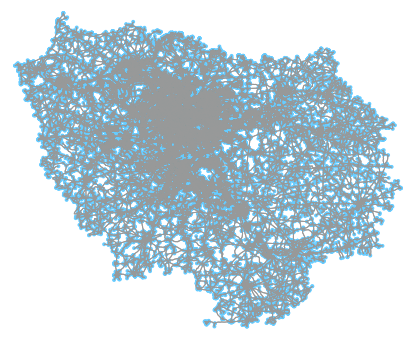

(<Figure size 805.654x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff441cd8130>)

In [6]:
ox.plot_graph(G_idf)

+ Ajout de données utiles au graphe

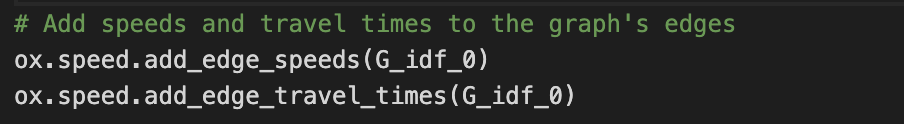

In [7]:
Image(filename = "images/speeds travel times.png")

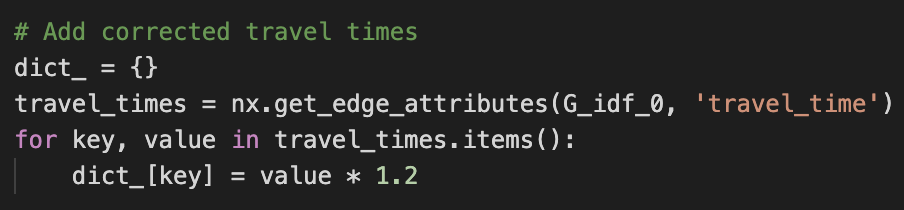

In [8]:
Image(filename = "images/corrected travel times.png")

+ Sauvegarde sur disque du graphe de l'Île-de-France sous plusieurs formats :
    + format `Pickle`
    + format `csv`

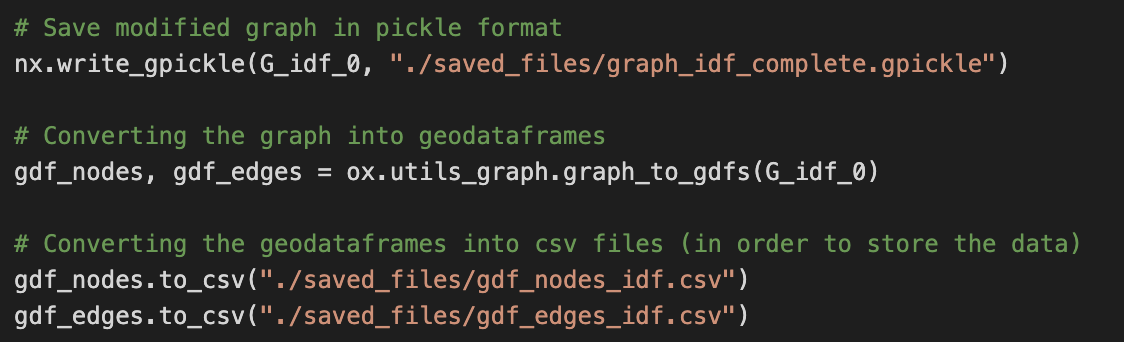

In [9]:
Image(filename = "images/save data.png")

#### Fichier `save_useful_data.py` (suite)
 + Intérêt de la sauvegarde en local  : gain de temps !

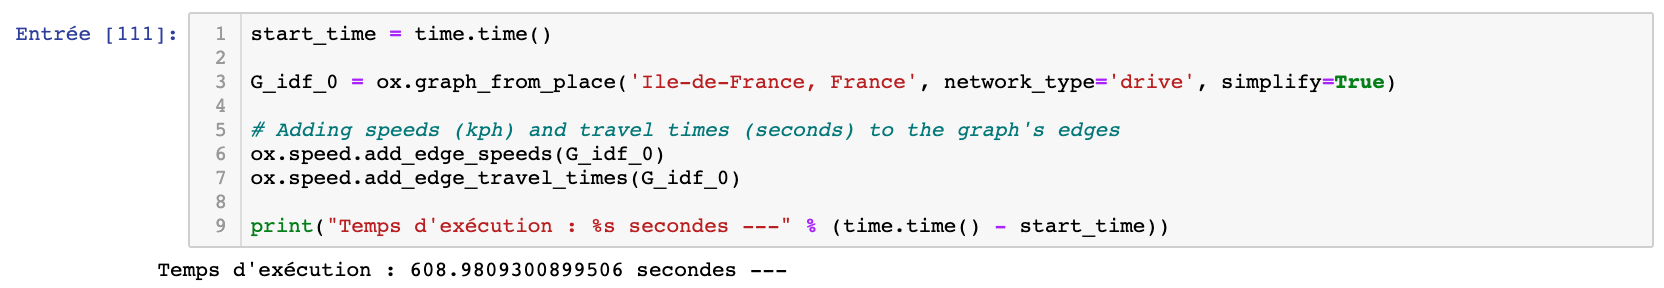

In [10]:
Image(filename = 'images/create graph idf.png')

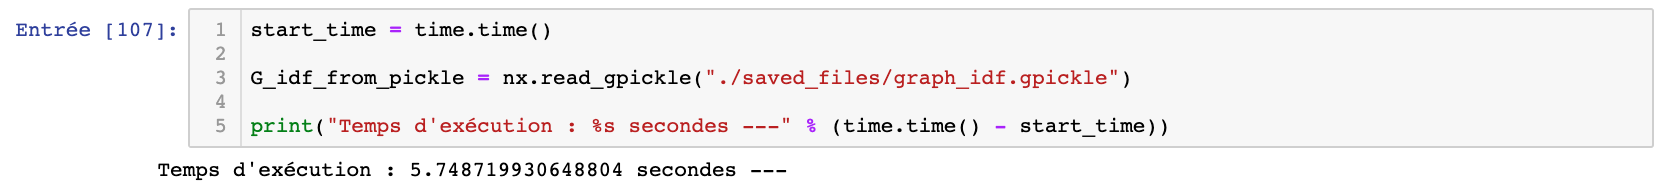

In [11]:
Image(filename = 'images/load graph idf.png')

## Etape n°1 :  Extraction des données géographiques, calculs de distances

+ Création du module `warehouses_clients`
<br>
+ Création du module `routes`

In [4]:
from warehouses_clients import *
from routes import *

### Module `warehouses_clients`

+ Chargement de `G_idf`


+ Création de la dataframe des entrepôts à partir du fichier `warehouses_idf.csv`

In [13]:
pd.read_csv("warehouses_idf.csv", sep=";")

,y,x,name,type,adress
0,48.754897,2.366262,Agence Chronopost Rungis,Agence Chronopost,"Centre technique routier D, 3 Rue des Transpor..."
1,48.714794,2.302966,Agence Chronopost Massy,Agence Chronopost,"au Berger, 2 rue Saint-Exupéry ZA La Butte, 91..."
2,48.967846,2.490294,Agence Chronopost Aulnay,Agence Chronopost,"43 Boulevard André Citroën, 93600 Aulnay-sous-..."
3,48.911495,2.433059,Agence Chronopost Bobigny,Agence Chronopost,"165 Avenue Henri Barbusse, 93000 Bobigny"
4,48.842213,2.301509,Agence Chronopost Lecourbe,Agence Chronopost,"Chrono City, 123 Rue Lecourbe, 75015 Paris"
5,48.781472,2.427903,Agence Chronopost de Brie-Comte-Robert,Agence Chronopost,"2 Chemin de Villeneuve Saint-Georges, 94140 Al..."
6,48.755959,1.930983,Agence Chronopost de Versailles,Agence Chronopost,"6 Rue André Marie Ampère, 78310 Coignières"
7,48.953458,2.193233,Agence Chronopost de Cormeilles en Parisis,Agence Chronopost,"6 Allée du 7ème Art, 95240 Cormeilles-en-Parisis"
8,48.898284,2.365380,Agence Chronopost Paris boulevard Ney,Agence Chronopost,"11-13 Boulevard Ney, 75018 Paris"
9,48.942985,2.310899,Agence Chronopost Villeneuve-la-Garenne,Agence Chronopost,"155 Boulevard Charles de Gaulle, 92390 Villene..."


### Module `warehouses_clients`
+ Fonction `random_clients(k, df = df_warehouses, G = G_idf)`

In [14]:
# exemple
df_test, indexes_test = random_clients(300)
print(f"indexes_test : {indexes_test}")
df_test

indexes_test : ([0, 19], [20, 319])


,y,x,name,type,adress
0,48.754897,2.366262,Agence Chronopost Rungis,Agence Chronopost,"Centre technique routier D, 3 Rue des Transpor..."
1,48.714794,2.302966,Agence Chronopost Massy,Agence Chronopost,"au Berger, 2 rue Saint-Exupéry ZA La Butte, 91..."
2,48.967846,2.490294,Agence Chronopost Aulnay,Agence Chronopost,"43 Boulevard André Citroën, 93600 Aulnay-sous-..."
3,48.911495,2.433059,Agence Chronopost Bobigny,Agence Chronopost,"165 Avenue Henri Barbusse, 93000 Bobigny"
4,48.842213,2.301509,Agence Chronopost Lecourbe,Agence Chronopost,"Chrono City, 123 Rue Lecourbe, 75015 Paris"
...,...,...,...,...,...
315,49.143935,2.296313,Client 295,None,None
316,48.539026,2.519796,Client 296,None,None
317,48.391198,3.155639,Client 297,None,None
318,48.915732,3.262436,Client 298,None,None


### Module `routes`
+ Fonction `nearest_nodes(df, G = G_idf)` <br>
    $\rightarrow$ détermine les noeuds de `G_idf` les plus proches

In [15]:
# exemple
coords_test, nodes_test = nearest_nodes(df_warehouses)
print(f"Liste des coordonnées : {coords_test}", "\n")
print(f"Liste des noeuds les plus proches : {nodes_test}")

Liste des coordonnées : [(48.754897, 2.366262), (48.714794, 2.302966), (48.967846, 2.490294), (48.911495, 2.433059), (48.842213, 2.301509), (48.781471999999994, 2.4279029999999997), (48.755959000000004, 1.9309830000000001), (48.953458000000005, 2.193233), (48.898284000000004, 2.36538), (48.942985, 2.310899), (49.038502, 2.1534720000000003), (48.990935, 2.542882), (48.821819, 2.722362), (48.949715999999995, 2.286061), (48.908057, 2.209987), (49.025419, 2.118881), (48.800336, 2.305234), (48.779825, 2.203774), (48.777976, 2.432886), (48.902305, 2.367363)] 

Liste des noeuds les plus proches : [56019802, 42118512, 336070667, 574733950, 110573261, 1732202894, 1879381575, 3966501749, 412699470, 4060580030, 502104962, 5630339018, 6181787604, 6255339733, 151265200, 506774569, 313946667, 125822164, 6872856484, 2829333446]


#### Visualisation des points sur une carte

In [5]:
from visualisation import *

In [17]:
visualize_nearest_nodes(df_complete, n_warehouses=20)

### Module `routes`
+ Fonction principale : `itineraries` <br>
    $\rightarrow$ calcule les meilleures routes reliant 2 à 2 les points <br>
    $\rightarrow$ s'appuie sur la fonction `nearest_nodes` et la méthode `shortest_path` du module `networkx`<br>
    $\rightarrow$ stocke les routes dans un dictionnaire et les poids de ces routes dans un tableau numpy 

In [18]:
# principe de la fonction itineraries (pour chaque paire de points)
depart = 56019802
arrivee = 6181787604
critere_optim = 'corrected_travel_time'
route = nx.shortest_path(G_idf, depart, arrivee, weight=critere_optim)  
total_weight = int(sum(ox.utils_graph.get_route_edge_attributes(G_idf, route, critere_optim)))
print(f"route : {route}", "\n")
print(f"temps de trajet : {total_weight} secondes")

route : [56019802, 679029670, 338365861, 913661127, 338365877, 338365884, 338365899, 338365902, 679029608, 56019801, 56019863, 56019860, 314046867, 151024946, 160220523, 247615918, 81108911, 81108980, 300519043, 81109063, 81109129, 469423887, 506267567, 344507558, 132213984, 81109560, 132181496, 25249406, 302607407, 415628806, 132176197, 257815252, 132176219, 250836592, 132176229, 132161428, 132146093, 4745626784, 245162450, 259190625, 132118608, 4745626773, 275921600, 254861934, 254861937, 254862099, 254862101, 254862102, 2958828458, 893256040, 303081888, 5221490034, 5221490030, 5221490041, 303079027, 1607447561, 2958953092, 1607447546, 1607447542, 1607447538, 7543986041, 6181787605, 6181787604] 

temps de trajet : 1718 secondes


### Visualisation du trajet le plus rapide entre deux points

In [6]:
visualize_travel_between_two_nodes(69, 31, line_color='teal')

#### Problème majeur de la fonction `itineraries` : le temps de calcul !!
+ complexité en $O(n^2)$
+ 2 secondes environ par calcul et stockage du trajet entre 2 points <br>
    $\Rightarrow$ plus de 5h pour calculer les meilleurs trajets reliant deux à deux 100 points !!

##### Pour pallier le problème :
+ stockage des trajets reliants les entrepôts entre eux 
+ stockage des résultats de cette fonction pour pouvoir travailler sur les autres parties du programme

## Etape n°2: Construction d'un graphe

+ Création du module `graphe`
+ Classe `Node`
+ Class `Graph`
+ méthodes: 
    + `create_graph_components(k)`
    + `make_graph()`
    + `make_dist_matrix(df)`
    + `generate_csv(G, df, indexes)`

### Class Node
+ classe générique pour créer tous les noeuds du graphe
+ initialisée avec les attributs: latitude, longitude, identifiant (unique), liste d'enfants
+ ses classes filles sont celles qui constituent le `Graph`: `Client`, `Colis`, `Garage`, `Entrepot`
+ méthode: `new_child` pour ajouter un noeud enfant à la liste des enfants

In [20]:
class Node:
    def __init__(self, lat : float, long : float):
        self.id = uuid4()
        self.lat = lat
        self.long = long
        self.children = [] 

In [21]:
class Colis(Node):
    def __init__(self, size: int, entrepot, destination):
        self.size = size
        self.entrepot = entrepot
        self.client = make_client(destination[0], destination[1], size) # les clients sont créés à partir des colis

class Garage(Node):   
    def __init__(self, lat: float, long: float, nb_camions: int, nb_legers: int):
        self.nb_camions = nb_camions
        self.nb_legers = nb_legers

class Entrepot(Node):
    def __init__(self, lat : float, long : float, max_camions : int, max_legers: int, capacite : int):
        self.max_camions = max_camions
        self.max_legers = max_legers
        self.capacite = capacite

## Classe Graph

+ constitue le squelette du réseau de livraison
+ 3 générations:
    + garage: racine
    + entrepots: enfants du garage
    + clients: enfants des entrepots et les enfants d'un meme entrepot sont enfants entre eux

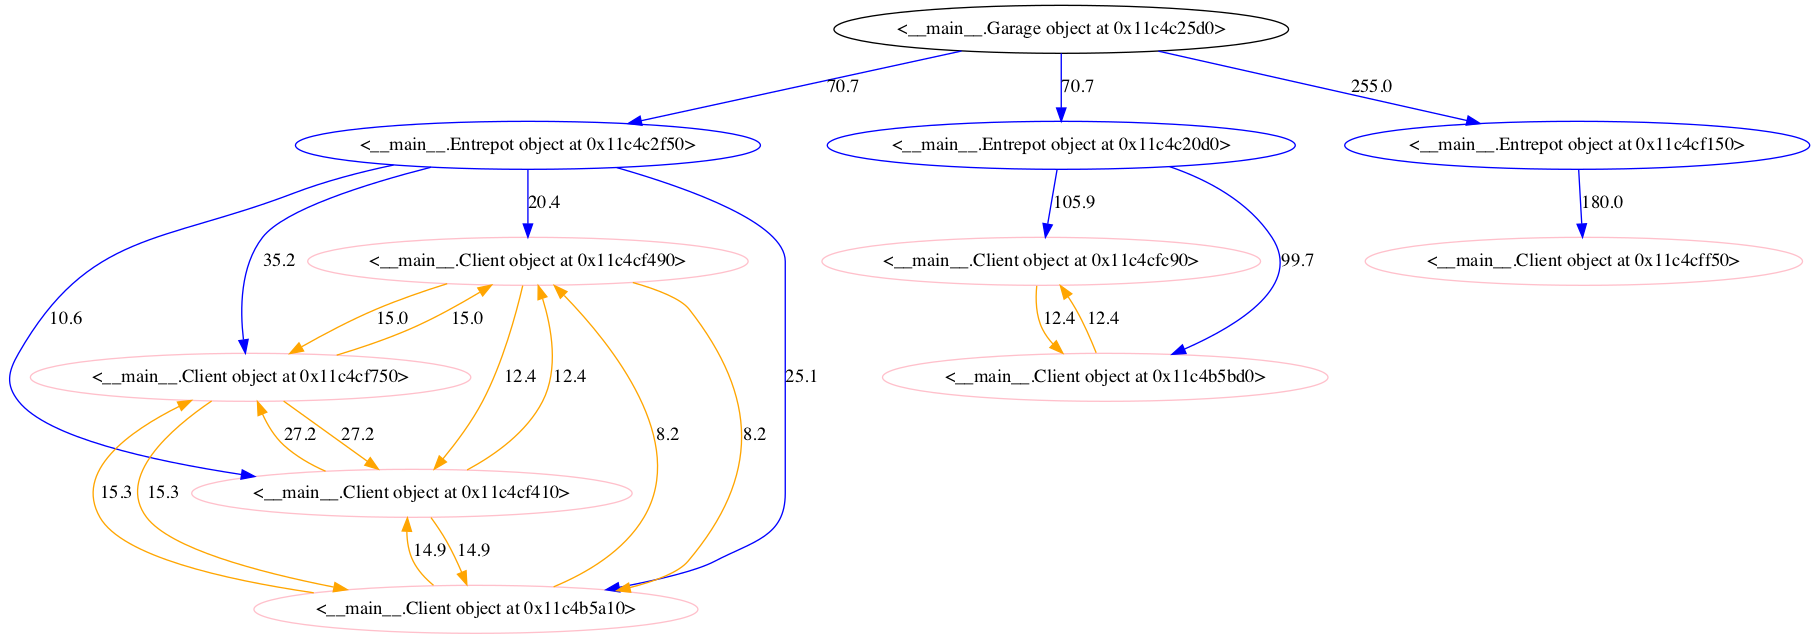

In [22]:
Image(filename = "images/graphe_exemple.png")

## Construction

0. Créer un garage

1. `create_graph_components(nbr_clients)` $\leftarrow$ `random_clients(nbre_clients)`

2. `make_graph()`: à partir du garage, des entrepots et des colis crée la structure décrite précédemment

3. `make_dist_matrix(df)` $\leftarrow$ `itineraries` 

4. `generate_csv(G, df, indexes)`: crée les fichiers csv qui serviront en entrée de l'algorithme d'optimisation

In [ ]:
# exemple

g = Garage (2.2728354, 48.8281142997349, 40, 60)
c = Camion(50, 0, 10000) # sera utile pour l'algorithme d'optimisation
k = 50 # chosir un nombre de clients

df, indexes, warehouses, parcels = create_graph_components(k)

G = Graph(g, warehouses, parcels, c)
G.make_graph()
G.make_dist_matrix(df)
generate_csv(G, df, indexes)

<ins>NB</ins>:

+ Le graphe peut etre créé sans matrice de distances
+ Dans ce cas: distance euclidienne

## Etape 3 : Implémentation d'un algorithme génétique pour optimiser un réseau de livraison en Ile de France

+ Creation du module `optim_gen`

+ Fonctions principales :
    + `no_client_to_deliver`
    + `one_client_to_deliver`
    + `run_vrptw`
    + `decode_to_GPS`
    + `simulation_vrptw`

## Fonctionnement de l'algorithme génétique

+ **Création d'un individu** : liste ordonnée de clients à visiter par l'ensemble des camions de l'entrepot
+ Définition d'une **population initiale** constituée de 100 individus
+ Choix d'un **nombre de générations**, qui correspondent chacune à une étape de l'évolution
+ Définition d'un **coût associé à chaque individu**, que l'on cherchera à minimiser par la suite

In [31]:
# exemple d'un individu décodé en route
print(f'individu : {[1,2,3,4]}')
print(f'après décodage, grâce à la matrice des coûts : {[[0,1,2,0], [0,3,0], [0,4,0]]}')

individu : [1, 2, 3, 4]
après décodage, grâce à la matrice des coûts : [[0, 1, 2, 0], [0, 3, 0], [0, 4, 0]]


## Etapes de l'évolution

+ **mutations par substitution** uniquement (on n'autorise que les transformations de type permutation)


+ **crossover** entre deux individus

In [32]:
# un exemple de mutation
import random
def mut_inverse_indexes(individual):
    '''
    Step of genetic algorithm : Mutation (only by inversion, to keep the unicity of each occurence) . No insertion or deletion allowed

    Input : individual (list)
    Output : mutated individual
    '''

    start, stop = sorted(random.sample(range(len(individual)), 2))
    print(f"indices d'inversion : {start, stop}")
    individual = individual[:start+1] + individual[stop:start:-1] + individual[stop+1:]
    return (individual, )
print(f"avant mutation :{[1,2,3,4,5,6,7,8,9]}")
print(f"après mutation : {mut_inverse_indexes([1,2,3,4,5,6,7,8,9])}")

avant mutation :[1, 2, 3, 4, 5, 6, 7, 8, 9]
indices d'inversion : (6, 7)
après mutation : ([1, 2, 3, 4, 5, 6, 7, 8, 9],)


In [33]:
#exemple de crossover

def cx_partialy_matched(ind1, ind2):
    '''
    Step of the genetic algorithm : crossover

    Input : two individuals (list)
    Output : two individuals that have been modified
    '''
    size = min(len(ind1), len(ind2))
    try:
        cxpoint1, cxpoint2 = sorted(random.sample(range(size), 2))
        print(f"les indices de début et de fin sont : {cxpoint1, cxpoint2}")
    except ValueError:
        print('Error : Only one package to deliver')
    temp1 = ind1[cxpoint1:cxpoint2+1] + ind2
    temp2 = ind2[cxpoint1:cxpoint2+1] + ind1
    ind1 = []
    for gene in temp1:
        if gene not in ind1:
            ind1.append(gene)
    ind2 = []
    for gene in temp2:
        if gene not in ind2:
            ind2.append(gene)
    return ind1, ind2

print(f"avant crossover :{[1,4,3,6,5,2], [4,3,5,2,6,1]}")
print(f"après mutation : {cx_partialy_matched([1,4,3,6,5,2], [4,3,5,2,6,1])}")

avant crossover :([1, 4, 3, 6, 5, 2], [4, 3, 5, 2, 6, 1])
les indices de début et de fin sont : (2, 5)
après mutation : ([3, 6, 5, 2, 4, 1], [5, 2, 6, 1, 4, 3])


## Simulation et optimisation d'un réseau de livraison

Les fonctions décrites par la suite sont des étapes de la fonction `simulation_vrptw`

+ Utilisation de la classe `Graphe` précédemment construite pour générer des fichiers csv correspondant chacun à l'ensemble des clients reliés à un entrepot et à leur demande pour un jour fixé. 

In [34]:
# entrepot 13
inputdata = pd.read_csv('images/exemple_simul_3_input.csv')
inputdata.drop('Unnamed: 0', 1, inplace=True)
inputdata

,Identifiant,Demande,latitude,longitude,entrepot,client 1,client 2,client 3,client 4,client 5
0,13,0.00,48.949716,2.286061,0.0,1932.0,4358.0,1276.0,2274.0,2423.0
1,24,0.62,49.058459,1.930484,1925.0,0.0,5693.0,2565.0,3609.0,3694.0
2,35,0.12,48.821412,3.137188,4285.0,5729.0,0.0,4007.0,4015.0,3819.0
3,52,0.54,48.835034,2.247933,1278.0,2405.0,4015.0,0.0,2641.0,1320.0
4,54,0.59,49.073293,2.672739,2232.0,3677.0,4053.0,2605.0,0.0,2945.0
5,63,0.86,48.739799,2.397568,2413.0,3589.0,3792.0,1351.0,2921.0,0.0


+ Fonction `no_client_to_deliver` pour enlever les dataframes inutiles 


+ Fonction `one_client_to_deliver` pour traiter séparément les cas où il n'y a qu'un seul client à livrer dans l'entrepôt numéro $i$ 


+ Utilisation de notre algorithme génétique 


+ Fonction `decode_to_GPS` pour exporter les résultats 

***Exemple*** : pour l'entrepôt 19, on obtient après évolution génétique un coût minimal de 2.26 h de trajet total. <br>
L'entrepot 19 étant le dernier a avoir été traité, on obtient par la suite les individus décodés en route pour chaque entrepôt où il y a au minimum deux clients à livrer.

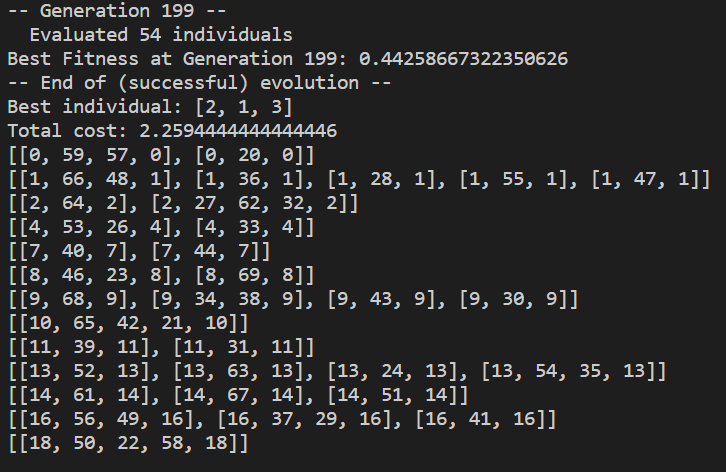

In [35]:
Image(filename = 'images/simul_3.png')

Les résultats pour chaque entrepot sont exportés sous forme de fichiers csv dans un dossier output_data.

Par exemple, pour l'entrepôt 13 de la simulation, on obtient un Dataframe de ce type:

In [36]:
res_entrepot = pd.read_csv('images/exemple_simul_3.csv')
res_entrepot.drop('Unnamed: 0', 1, inplace = True)
res_entrepot

,camion1,camion2,camion3,camion4
0,13.0,13.0,13.0,13.0
1,52.0,63.0,24.0,54.0
2,13.0,13.0,13.0,35.0
3,NaN,NaN,NaN,13.0


Remarque : On a pris comme coût un coût temporel fixé par les contraintes de travail des camionneurs (qui ne doivent pas dépasser 8h de travail) en prenant également en compte la perte de temps due au temps de livraison.

#### Visualisation du résultat

In [7]:
visualize_single_warehouse_travel('./output_data/res_entrepot_13.csv')

<center>
    
<h1> Conclusion - pistes d'amélioration du programme </h1>

</center>

+ Programme **facilement adaptable** :
    + autres types de véhicules
    + autres critères d'optimalité
    + largeur de la route 
    
    
+ Pistes d'**amélioration** (modifications plus importantes) :
    + passage par plusieurs entrepôts dans la journée

<center>
    
<h1> <u> Remerciements</u> </h1>

<h3> Ignacio SOMOZA SOTILLOS - Stanislas BARRAULT </h3>

<h3> Valérie ROY </h3>

<h3> Et merci à tous pour votre attention !  </h3>

</center>